In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Download Dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = keras.utils.get_file(fname='flower_photos', origin=dataset_url, cache_dir='.', untar=True)
import pathlib
datadir = pathlib.Path(dataset_dir)
datadir

228813984/228813984 [==============================] - 1s 0us/step


PosixPath('datasets/flower_photos')

In [ ]:
# Define Classes and Labels
flowers = {'daisy': list(datadir.glob("daisy/*")),
           'dandelion': list(datadir.glob("dandelion/*")),
           'roses': list(datadir.glob("roses/*")),
           'sunflowers': list(datadir.glob("sunflowers/*")),
           'tulips': list(datadir.glob("tulips/*"))}
labels = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4
}

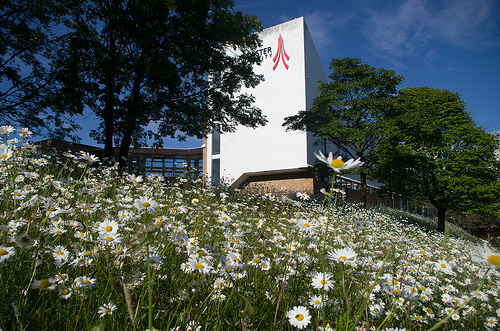

In [ ]:
PIL.Image.open(str(flowers['daisy'][0]))

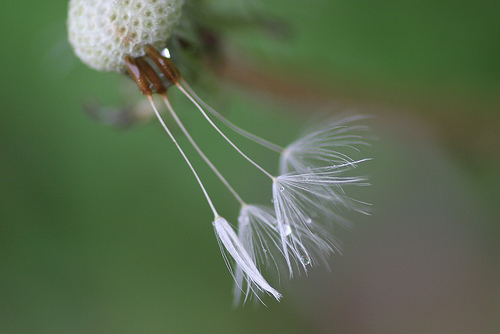

In [ ]:
PIL.Image.open(str(flowers['dandelion'][0]))

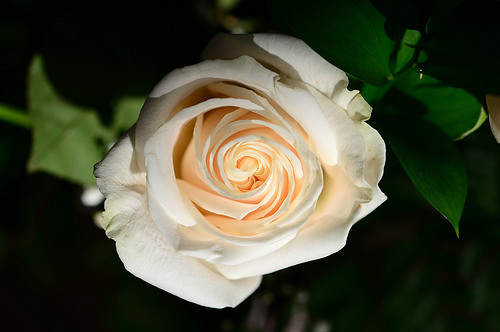

In [ ]:
PIL.Image.open(str(flowers['roses'][8]))

In [ ]:
# Data Preprocessing
x = []
y = []
for image_name, image in flowers.items():
    for img in image:
        img = cv2.imread(str(img))  # converts image from its dir to np array to represent the image
        resized = cv2.resize(img, (224, 224))  # ResNet-50 accepts 224x224 images
        x.append(resized)
        y.append(labels[image_name])
x = np.array(x)
y = np.array(y)

In [ ]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [ ]:
# Calculate and print the number of images in the train and test datasets
num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
print(f"Number of images in the training set: {num_train_images}")
print(f"Number of images in the testing set: {num_test_images}")

Number of images in the training set: 2569
Number of images in the testing set: 1101


In [ ]:
# Data Scaling
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
# ResNet-50 Model
model_resnet50 = keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_shape=(224, 224, 3),
    classes=1000  # Number of classes in the ImageNet dataset
)

102967424/102967424 [==============================] - 6s 0us/step


In [ ]:
# Modify the last layer for the specific number of classes (5 in this case)
x = model_resnet50.layers[-2].output
output = keras.layers.Dense(5, activation='softmax')(x)
model_resnet50 = keras.models.Model(inputs=model_resnet50.input, outputs=output)

In [ ]:
# Compile the ResNet-50 Model
model_resnet50.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Model Training
model_resnet50.fit(x_train_scaled, y_train, epochs=10)
# Define the path where you want to save the model
model_save_path = '/content/drive/MyDrive/Cv/model_resnet50.h5'

# Save the model
model_resnet50.save(model_save_path)

print(f"Model saved to {model_save_path}")

Epoch 1/10
81/81 [==============================] - 72s 343ms/step - loss: 1.0092 - accuracy: 0.6929
Epoch 2/10
81/81 [==============================] - 26s 317ms/step - loss: 0.5912 - accuracy: 0.8077
Epoch 3/10
81/81 [==============================] - 26s 323ms/step - loss: 0.4845 - accuracy: 0.8350
Epoch 4/10
81/81 [==============================] - 26s 317ms/step - loss: 0.3412 - accuracy: 0.8774
Epoch 5/10
81/81 [==============================] - 26s 317ms/step - loss: 0.2688 - accuracy: 0.9054
Epoch 6/10
81/81 [==============================] - 26s 320ms/step - loss: 0.2608 - accuracy: 0.9089
Epoch 7/10
81/81 [==============================] - 26s 318ms/step - loss: 0.3478 - accuracy: 0.8902
Epoch 8/10
81/81 [==============================] - 26s 318ms/step - loss: 0.3154 - accuracy: 0.8968
Epoch 9/10
81/81 [==============================] - 26s 318ms/step - loss: 0.1403 - accuracy: 0.9568
Epoch 10/10
81/81 [==============================] - 26s 317ms/step - loss: 0.1276 - accura

In [ ]:
# Model Evaluation
model_resnet50.evaluate(x_test_scaled, y_test)

35/35 [==============================] - 6s 133ms/step - loss: 0.8656 - accuracy: 0.6594


[0.8655862212181091, 0.6594005227088928]

Saving tulip.jpg to tulip.jpg


1/1 [==============================] - 1s 855ms/step


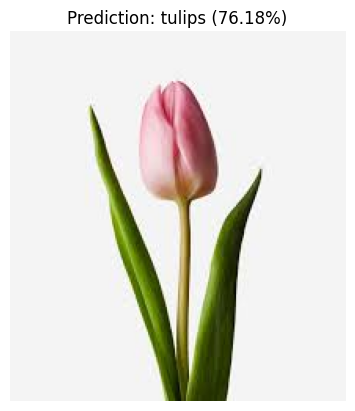

In [ ]:
# Import necessary libraries for upload and display
from google.colab import files
from IPython.display import display

# Load the trained model
model_save_path = '/content/drive/MyDrive/Cv/model_resnet50.h5'
model = keras.models.load_model(model_save_path)

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 pixels
    img_array = np.array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match input shape
    img_array = img_array / 255.0  # Normalize the image array
    return img_array

# Function to decode predictions
def decode_predictions(predictions):
    labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    return labels[np.argmax(predictions)], np.max(predictions)

# Create file upload interface
uploaded = files.upload()

# Process the uploaded image and make predictions
for fn in uploaded.keys():
    path = fn
    img_array = preprocess_image(path)  # Preprocess the image

    # Make predictions
    predictions = model.predict(img_array)
    label, confidence = decode_predictions(predictions)

    # Load the image again to display it
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with its label
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()
